In [28]:
from qiskit_aer import AerSimulator
from qiskit import *
import supermarq
import numpy as np 
import os
import qiskit
emulator = Aer.get_backend('aer_simulator_density_matrix')

In [112]:
hsim_qubits = {}
for i in range(3, 20, 2):
    num = str(i)
    label ='hsim'+num
    benchmarks = [(supermarq.hamiltonian_simulation.HamiltonianSimulation(i)),]
    hsim_qubits[label] = benchmarks
print(hsim_qubits) 

{'hsim3': [<supermarq.benchmarks.hamiltonian_simulation.HamiltonianSimulation object at 0x7d1d20d71de0>], 'hsim5': [<supermarq.benchmarks.hamiltonian_simulation.HamiltonianSimulation object at 0x7d1d20d708b0>], 'hsim7': [<supermarq.benchmarks.hamiltonian_simulation.HamiltonianSimulation object at 0x7d1d20d72710>], 'hsim9': [<supermarq.benchmarks.hamiltonian_simulation.HamiltonianSimulation object at 0x7d1d20d73280>], 'hsim11': [<supermarq.benchmarks.hamiltonian_simulation.HamiltonianSimulation object at 0x7d1d20d71750>], 'hsim13': [<supermarq.benchmarks.hamiltonian_simulation.HamiltonianSimulation object at 0x7d1d20d70af0>], 'hsim15': [<supermarq.benchmarks.hamiltonian_simulation.HamiltonianSimulation object at 0x7d1d20d737f0>], 'hsim17': [<supermarq.benchmarks.hamiltonian_simulation.HamiltonianSimulation object at 0x7d1d20d72b60>], 'hsim19': [<supermarq.benchmarks.hamiltonian_simulation.HamiltonianSimulation object at 0x7d1d20dbbee0>]}


In [110]:
benchmark_features = {}
for label, benchmark in hsim_qubits:
    print(hsim_qubits[label])

ValueError: too many values to unpack (expected 2)

In [ ]:
benchmark_features = {}
for label, benchmark in hsim_qubits:
    benchmark_features[label] = [
        supermarq.converters.compute_communication_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_depth_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_entanglement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_liveness_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_measurement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_parallelism_with_qiskit(benchmark.qiskit_circuit()),]
print(benchmark_features)

In [95]:
for benchmark, label in benchmark_features:
    print(benchmark_features[label])
    #circuit=benchmarks[label].qiskit_circuit()
    print("\n------------------------------",i[1],"-----------------------------")
    #print(circuit.draw())

ValueError: too many values to unpack (expected 2)

In [62]:
jobs = []
for benchmark, label in benchmarks:
    job = emulator.run(benchmark.qiskit_circuit(), shots=1000)
    jobs.append((label, job, benchmark))


for x in range(len(jobs)):
    print(jobs[x])

('hsim12', <qiskit_aer.jobs.aerjob.AerJob object at 0x7d1d20ed8f40>, <supermarq.benchmarks.hamiltonian_simulation.HamiltonianSimulation object at 0x7d1d20fed240>)


In [23]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [30]:
device_scores = {}
for label, job, benchmark in jobs:
    if job.status() == qiskit.providers.jobstatus.JobStatus.DONE:
        counts = job.result(0).get_counts()
        print(counts)
        score = benchmark.score(counts)
        print(score)
        device_scores[label] = score
    else:
        print(label, "not done!")

{'0010': 3, '0001': 2, '1111': 511, '1011': 82, '0011': 13, '0111': 92, '1110': 99, '1000': 4, '0110': 16, '1101': 97, '0100': 2, '1100': 20, '0101': 16, '1001': 15, '0000': 1, '1010': 27}
0.9911966094067258
{'01010': 1, '10100': 1, '00010': 1, '11001': 11, '01011': 17, '01001': 2, '10001': 3, '11010': 15, '00101': 2, '10000': 2, '11011': 72, '01111': 82, '10110': 18, '00011': 2, '00111': 14, '11101': 97, '11000': 7, '11111': 420, '10010': 1, '10101': 10, '11100': 15, '10111': 84, '11110': 76, '01110': 9, '10011': 15, '01101': 19, '01000': 1, '00110': 3}
0.9906466094067257


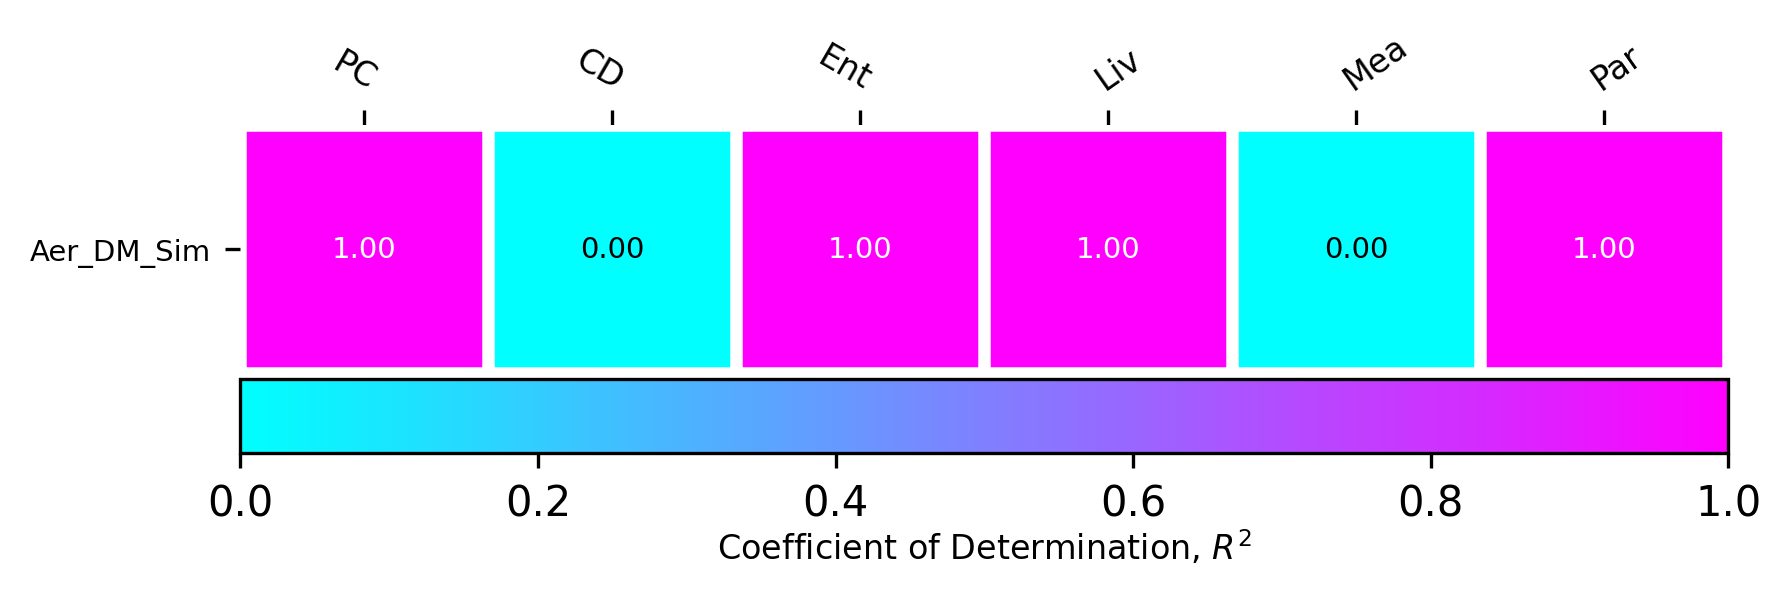

In [31]:
supermarq.plotting.plot_correlations(benchmark_features,
    device_scores,
    ["PC", "CD", "Ent", "Liv", "Mea", "Par"],
    device_name="Aer_DM_Sim",)